In [ ]:
#Importando bibliotecas

In [1]:
import pandas as pd
import sqlalchemy
import pymysql
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#conectando com o servidor local MySql

In [3]:
connect_string = 'mysql+pymysql://{}:{}@{}:{}/{}?charset=utf8'.format('root', 'tricolor21', 'localhost', '3306', 'proj4')
engine = sqlalchemy.create_engine(connect_string)
cnx = engine.connect()
sql = '''
SELECT *
FROM account
'''
result = cnx.execute(sql)
account = result

In [ ]:
#Importando tabela account

In [25]:
db_account = pd.DataFrame(account)

In [26]:
db_account.head()

,0,1,2,3
0,1,18,monthly issuance,1995-03-24
1,2,1,monthly issuance,1993-02-26
2,3,5,monthly issuance,1997-07-07
3,4,12,monthly issuance,1996-02-21
4,5,15,monthly issuance,1997-05-30


In [27]:
acc_cols = ['account_id', 'district_id', 'frequency', 'account_date']

In [28]:
db_account.columns = acc_cols

In [29]:
db_account.head()

,account_id,district_id,frequency,account_date
0,1,18,monthly issuance,1995-03-24
1,2,1,monthly issuance,1993-02-26
2,3,5,monthly issuance,1997-07-07
3,4,12,monthly issuance,1996-02-21
4,5,15,monthly issuance,1997-05-30


In [30]:
#Importando tabela card

In [4]:
connect_string = 'mysql+pymysql://{}:{}@{}:{}/{}?charset=utf8'.format('root', 'tricolor21', 'localhost', '3306', 'proj4')
engine = sqlalchemy.create_engine(connect_string)
cnx = engine.connect()
sql = '''
SELECT *
FROM account
'''
result = cnx.execute(sql)
account = result

In [5]:
tables = ['account', 'card', 'client', 'disp', 'district', 'loan', 'orders', 'transactions']

In [6]:
#SELECT no servidor SQL. ***TIRAR A SENHA***
dbs = []
for table in tables:

    connect_string = 'mysql+pymysql://{}:{}@{}:{}/{}?charset=utf8'.format('root', 'tricolor21', 'localhost', '3306', 'proj4')
    engine = sqlalchemy.create_engine(connect_string)
    cnx = engine.connect()
    sql = 'SELECT * FROM ' + table 
    result = cnx.execute(sql)
    dbs.append(result)

In [7]:
#criando PandasDataFrames das tabelas

db_account = pd.DataFrame(dbs[0])
db_card = pd.DataFrame(dbs[1])
db_client = pd.DataFrame(dbs[2])
db_disp = pd.DataFrame(dbs[3])
db_district = pd.DataFrame(dbs[4])
db_loan = pd.DataFrame(dbs[5])
db_orders = pd.DataFrame(dbs[6])
db_transactions = pd.DataFrame(dbs[7])

In [8]:
db_account.columns = ['account_id','district_id','frequency','account_date']
db_card.columns = ['card_id','disp_id','type','issue_date']
db_client.columns = ['client_id','birth_number','district_id','gender']
db_disp.columns = ['disp_id','client_id','account_id','type']
db_district.columns = ['district_id','district_name','district_region','no_inhabitants', 'no_inhabitants499',
                      'no_inhabitants1999','no_inhabitants9999','no_inhabitants10000', 'no_cities', 'ratio_urban_inhabitants',
                      'avg_salary', 'unemployment_rate95', 'unemployment_rate96', 'rate_entrepreneurs', 'no_crimes95',
                      'no_crimes96']
db_loan.columns = ['loan_id', 'account_id', 'amount', 'duration', 'payments', 'status', 'date_loan']
db_orders.columns = ['order_id', 'account_id', 'bank_to', 'account_to', 'amount', 'k_symbol']
db_transactions.columns = ['index', 'trans_id', 'account_id', 'transac_type', 'operation', 'amount', 'balance', 'k_symbol',
                          'bank', 'account', 'date_trans']

In [9]:
accs_distr = db_account.merge(db_district, on='district_id')

In [10]:
accs_distr.district_region.value_counts()

south Moravia      778
north Moravia      745
central Bohemia    574
Prague             554
east Bohemia       544
north Bohemia      457
west Bohemia       430
south Bohemia      370
Name: district_region, dtype: int64

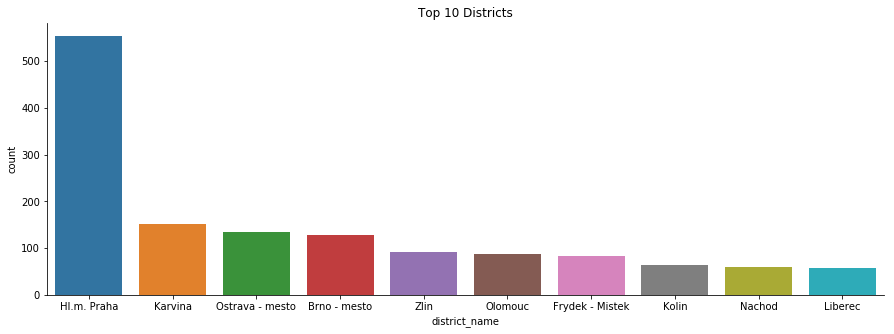

In [11]:
#Grafico de número de contas por distrito
plt.figure(figsize=(15,5))
plt.title('Top 10 Districts')
sns.countplot(x='district_name', data=accs_distr, order=accs_distr['district_name'].value_counts().index[:10]);
sns.despine()

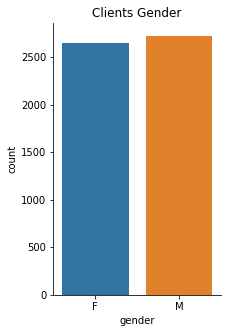

In [12]:
#Grafico de número de contas por distrito
plt.figure(figsize=(3,5))
plt.title('Clients Gender')
sns.countplot(x='gender', data=db_client);
sns.despine()

In [13]:
db_client.head()

,client_id,birth_number,district_id,gender
0,1,701213,18,F
1,2,450204,1,M
2,3,401009,1,F
3,4,561201,5,M
4,5,600703,5,F


In [14]:
db_client.birth_number = db_client.birth_number.apply(str)

In [15]:
db_client.birth_number = ['19'+ i for i in db_client.birth_number]

In [16]:
db_client.birth_number = db_client['birth_number'].apply(str)

In [17]:
db_client.birth_number = pd.to_datetime(db_client.birth_number, format="%Y/%m/%d")

In [18]:
db_client['year'] = db_client['birth_number'].dt.year

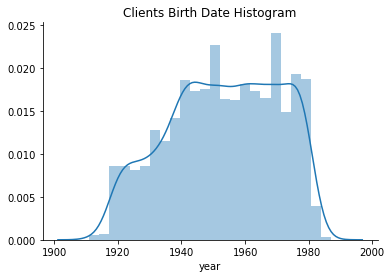

In [19]:
plt.title('Clients Birth Date Histogram')
sns.distplot(db_client.year);
sns.despine()

In [20]:
db_account.head()

,account_id,district_id,frequency,account_date
0,1,18,monthly issuance,1995-03-24
1,2,1,monthly issuance,1993-02-26
2,3,5,monthly issuance,1997-07-07
3,4,12,monthly issuance,1996-02-21
4,5,15,monthly issuance,1997-05-30


In [21]:
db_card.head()

,card_id,disp_id,type,issue_date
0,1,9,gold,1998-10-16
1,2,19,classic,1998-03-13
2,3,41,gold,1995-09-03
3,4,42,classic,1998-11-26
4,5,51,junior,1995-04-24


In [22]:
db_client.head()

,client_id,birth_number,district_id,gender,year
0,1,1970-12-13,18,F,1970
1,2,1945-02-04,1,M,1945
2,3,1940-10-09,1,F,1940
3,4,1956-12-01,5,M,1956
4,5,1960-07-03,5,F,1960


In [23]:
db_disp.head()

,disp_id,client_id,account_id,type
0,1,1,1,OWNER
1,2,2,2,OWNER
2,3,3,2,DISPONENT
3,4,4,3,OWNER
4,5,5,3,DISPONENT


In [24]:
db_district.head()

,district_id,district_name,district_region,no_inhabitants,no_inhabitants499,no_inhabitants1999,no_inhabitants9999,no_inhabitants10000,no_cities,ratio_urban_inhabitants,avg_salary,unemployment_rate95,unemployment_rate96,rate_entrepreneurs,no_crimes95,no_crimes96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [25]:
db_loan.head()

,loan_id,account_id,amount,duration,payments,status,date_loan
0,4959,2,80952,24,3373.0,A,1994-01-05
1,4961,19,30276,12,2523.0,B,1996-04-29
2,4962,25,30276,12,2523.0,A,1997-12-08
3,4967,37,318480,60,5308.0,D,1998-10-14
4,4968,38,110736,48,2307.0,C,1998-04-19


In [26]:
db_loan.status.value_counts()

C    403
A    203
D     45
B     31
Name: status, dtype: int64

In [27]:
db_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 7 columns):
loan_id       682 non-null int64
account_id    682 non-null int64
amount        682 non-null int64
duration      682 non-null int64
payments      682 non-null float64
status        682 non-null object
date_loan     682 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 37.4+ KB


In [28]:
db_orders.head()

,order_id,account_id,bank_to,account_to,amount,k_symbol
0,29401,1,YZ,87144583,2452.0,None
1,29402,2,ST,89597016,3372.7,None
2,29403,2,QR,13943797,7266.0,None
3,29404,3,WX,83084338,1135.0,None
4,29405,3,CD,24485939,327.0,None


In [29]:
db_transactions.head()

,index,trans_id,account_id,transac_type,operation,amount,balance,k_symbol,bank,account,date_trans
0,149431,1,1,credit,credit in cash,1000.0,1000.0,None,None,NaN,1995-03-24
1,157403,5,1,credit,collection from another bank,3679.0,4679.0,None,AB,41403269.0,1995-04-13
2,167082,6,1,credit,collection from another bank,3679.0,20977.2,None,AB,41403269.0,1995-05-13
3,177507,7,1,credit,collection from another bank,3679.0,26835.2,None,AB,41403269.0,1995-06-13
4,188171,8,1,credit,collection from another bank,3679.0,30414.8,None,AB,41403269.0,1995-07-13


## Modelando regressao Logistica para Default de acordo com caracteristicas demograficas

In [30]:
db_district.head()

,district_id,district_name,district_region,no_inhabitants,no_inhabitants499,no_inhabitants1999,no_inhabitants9999,no_inhabitants10000,no_cities,ratio_urban_inhabitants,avg_salary,unemployment_rate95,unemployment_rate96,rate_entrepreneurs,no_crimes95,no_crimes96
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [31]:
m = db_district.merge(db_account,how='left')

In [32]:
m.head()

,district_id,district_name,district_region,no_inhabitants,no_inhabitants499,no_inhabitants1999,no_inhabitants9999,no_inhabitants10000,no_cities,ratio_urban_inhabitants,avg_salary,unemployment_rate95,unemployment_rate96,rate_entrepreneurs,no_crimes95,no_crimes96,account_id,frequency,account_date
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,2,monthly issuance,1993-02-26
1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,17,monthly issuance,1997-01-08
2,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,22,monthly issuance,1994-03-23
3,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,36,monthly issuance,1993-07-01
4,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107,49,monthly issuance,1997-04-06


In [33]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4452 entries, 0 to 4451
Data columns (total 19 columns):
district_id                4452 non-null int64
district_name              4452 non-null object
district_region            4452 non-null object
no_inhabitants             4452 non-null int64
no_inhabitants499          4452 non-null int64
no_inhabitants1999         4452 non-null int64
no_inhabitants9999         4452 non-null int64
no_inhabitants10000        4452 non-null int64
no_cities                  4452 non-null int64
ratio_urban_inhabitants    4452 non-null float64
avg_salary                 4452 non-null int64
unemployment_rate95        4452 non-null float64
unemployment_rate96        4452 non-null float64
rate_entrepreneurs         4452 non-null int64
no_crimes95                4452 non-null int64
no_crimes96                4452 non-null int64
account_id                 4452 non-null int64
frequency                  4452 non-null object
account_date               4452 non-nu

In [34]:
m1 = m.merge(db_loan,on='account_id')

In [35]:
m1.head()

,district_id,district_name,district_region,no_inhabitants,no_inhabitants499,no_inhabitants1999,no_inhabitants9999,no_inhabitants10000,no_cities,ratio_urban_inhabitants,...,no_crimes96,account_id,frequency,account_date,loan_id,amount,duration,payments,status,date_loan
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,99107,2,monthly issuance,1993-02-26,4959,80952,24,3373.0,A,1994-01-05
1,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,99107,426,monthly issuance,1993-11-29,5060,252060,60,4201.0,D,1994-07-19
2,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,99107,718,monthly issuance,1996-03-03,5117,76944,12,6412.0,A,1997-08-20
3,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,99107,1603,monthly issuance,1993-05-09,5285,78936,12,6578.0,A,1994-02-06
4,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,...,99107,1869,monthly issuance,1996-06-14,5332,37944,36,1054.0,C,1998-01-29


In [36]:
m1.status.replace('A',0, inplace=True)

In [37]:
#Alterando status dos loans em 0:'No Problems' e 1:'Problems'
m1.status.replace('B',1, inplace=True)
m1.status.replace('C',0, inplace=True)
m1.status.replace('D',1, inplace=True)

In [38]:
m2 = m1.merge(db_disp,on='account_id')

In [39]:
m3 = m2.merge(db_client, on='client_id')

In [40]:
m3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 817
Data columns (total 32 columns):
district_id_x              818 non-null int64
district_name              818 non-null object
district_region            818 non-null object
no_inhabitants             818 non-null int64
no_inhabitants499          818 non-null int64
no_inhabitants1999         818 non-null int64
no_inhabitants9999         818 non-null int64
no_inhabitants10000        818 non-null int64
no_cities                  818 non-null int64
ratio_urban_inhabitants    818 non-null float64
avg_salary                 818 non-null int64
unemployment_rate95        818 non-null float64
unemployment_rate96        818 non-null float64
rate_entrepreneurs         818 non-null int64
no_crimes95                818 non-null int64
no_crimes96                818 non-null int64
account_id                 818 non-null int64
frequency                  818 non-null object
account_date               818 non-null object
loan_id    

In [41]:
m3.columns

Index(['district_id_x', 'district_name', 'district_region', 'no_inhabitants',
       'no_inhabitants499', 'no_inhabitants1999', 'no_inhabitants9999',
       'no_inhabitants10000', 'no_cities', 'ratio_urban_inhabitants',
       'avg_salary', 'unemployment_rate95', 'unemployment_rate96',
       'rate_entrepreneurs', 'no_crimes95', 'no_crimes96', 'account_id',
       'frequency', 'account_date', 'loan_id', 'amount', 'duration',
       'payments', 'status', 'date_loan', 'disp_id', 'client_id', 'type',
       'birth_number', 'district_id_y', 'gender', 'year'],
      dtype='object')

In [42]:
reglog = m3[['no_inhabitants','ratio_urban_inhabitants','avg_salary','unemployment_rate95','unemployment_rate96',
             'rate_entrepreneurs','no_crimes95','no_crimes96','loan_id','amount','duration','status','gender', 'year']]

In [43]:
reglog.head()

,no_inhabitants,ratio_urban_inhabitants,avg_salary,unemployment_rate95,unemployment_rate96,rate_entrepreneurs,no_crimes95,no_crimes96,loan_id,amount,duration,status,gender,year
0,1204953,100.0,12541,0.29,0.43,167,85677,99107,4959,80952,24,0,M,1945
1,1204953,100.0,12541,0.29,0.43,167,85677,99107,4959,80952,24,0,F,1940
2,1204953,100.0,12541,0.29,0.43,167,85677,99107,5060,252060,60,1,F,1965
3,1204953,100.0,12541,0.29,0.43,167,85677,99107,5117,76944,12,0,F,1956
4,1204953,100.0,12541,0.29,0.43,167,85677,99107,5285,78936,12,0,F,1957


In [44]:
reglog.drop_duplicates('loan_id', keep='first', inplace=True)

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [45]:
reglog.gender.replace('M',0,inplace=True)
reglog.gender.replace('F',1,inplace=True)

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [46]:
#calculando a idade do cliente que pediu o emprestimo no ano de 1999
reglog.year = reglog.year.apply(lambda x: 1999 - x)

D:\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [47]:
reglog.head()

,no_inhabitants,ratio_urban_inhabitants,avg_salary,unemployment_rate95,unemployment_rate96,rate_entrepreneurs,no_crimes95,no_crimes96,loan_id,amount,duration,status,gender,year
0,1204953,100.0,12541,0.29,0.43,167,85677,99107,4959,80952,24,0,0,54
2,1204953,100.0,12541,0.29,0.43,167,85677,99107,5060,252060,60,1,1,34
3,1204953,100.0,12541,0.29,0.43,167,85677,99107,5117,76944,12,0,1,43
4,1204953,100.0,12541,0.29,0.43,167,85677,99107,5285,78936,12,0,1,42
5,1204953,100.0,12541,0.29,0.43,167,85677,99107,5332,37944,36,0,1,33


In [48]:
reglog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 674 entries, 0 to 816
Data columns (total 14 columns):
no_inhabitants             674 non-null int64
ratio_urban_inhabitants    674 non-null float64
avg_salary                 674 non-null int64
unemployment_rate95        674 non-null float64
unemployment_rate96        674 non-null float64
rate_entrepreneurs         674 non-null int64
no_crimes95                674 non-null int64
no_crimes96                674 non-null int64
loan_id                    674 non-null int64
amount                     674 non-null int64
duration                   674 non-null int64
status                     674 non-null int64
gender                     674 non-null int64
year                       674 non-null int64
dtypes: float64(3), int64(11)
memory usage: 79.0 KB


## Analisando dados para Regressão Logística

### Temos dados ausentes?

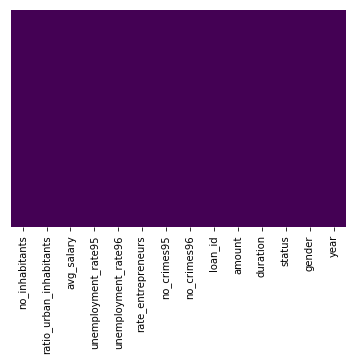

In [49]:
sns.heatmap(reglog.isnull(),yticklabels=False,cbar=False,cmap='viridis');

### Não temos dados ausentes, vamos observar como alguns dados se comportam

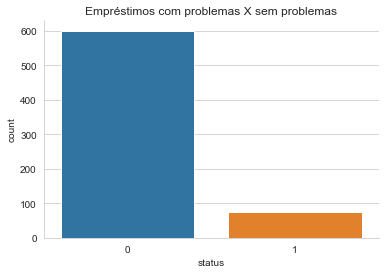

In [50]:
sns.set_style('whitegrid')
plt.title('Empréstimos com problemas X sem problemas')
sns.countplot(x='status',data=reglog)
sns.despine();

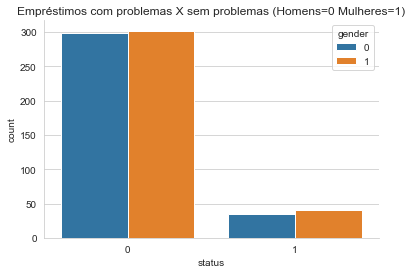

In [51]:
plt.title('Empréstimos com problemas X sem problemas (Homens=0 Mulheres=1)')
sns.countplot(x='status',data=reglog,hue='gender')
sns.despine();

### Temos uma grande discrepância entre os dados de nossa variável resposta (600 sem problemas X 74 problemáticos)

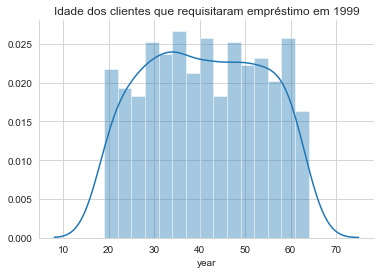

In [52]:
plt.title('Idade dos clientes que requisitaram empréstimo em 1999')
sns.distplot(reglog.year,bins=15)
sns.despine();

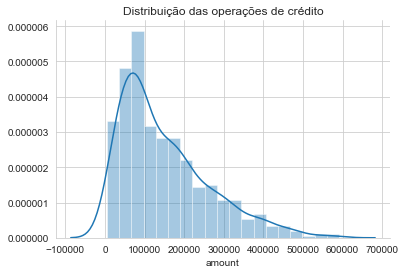

In [53]:
plt.title('Distribuição das operações de crédito')
sns.distplot(reglog.amount)
sns.despine();

## Construindo o modelo de Regressão Logística

### Divisão treino-teste

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = reglog[['no_inhabitants', 'ratio_urban_inhabitants', 'avg_salary',
       'unemployment_rate95', 'unemployment_rate96', 'rate_entrepreneurs',
       'no_crimes95', 'no_crimes96', 'amount', 'duration',
       'gender', 'year']]

In [56]:
Y = reglog['status']

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

### Training and Predicting

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)

D:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
predictions = logmodel.predict(X_test)

### Avaliação

In [61]:
from sklearn.metrics import classification_report

In [62]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       180
           1       0.00      0.00      0.00        23

   micro avg       0.89      0.89      0.89       203
   macro avg       0.44      0.50      0.47       203
weighted avg       0.79      0.89      0.83       203



D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
print(confusion_matrix(Y_test,predictions))

[[180   0]
 [ 23   0]]


In [65]:
logmodel.coef_[0]

array([-5.10800815e-06,  4.20647530e-05, -3.08067537e-04,  1.50837456e-06,
        1.14210448e-06, -1.48131039e-04,  2.45403167e-04, -1.44124894e-04,
        5.50788462e-06, -1.04444959e-04,  2.28878466e-06,  1.56060871e-05])

In [66]:
X.columns

Index(['no_inhabitants', 'ratio_urban_inhabitants', 'avg_salary',
       'unemployment_rate95', 'unemployment_rate96', 'rate_entrepreneurs',
       'no_crimes95', 'no_crimes96', 'amount', 'duration', 'gender', 'year'],
      dtype='object')

In [67]:
db_coef = pd.DataFrame(logmodel.coef_[0], X.columns, columns=['Coefficient'])
db_coef

,Coefficient
no_inhabitants,-0.000005
ratio_urban_inhabitants,0.000042
avg_salary,-0.000308
unemployment_rate95,0.000002
unemployment_rate96,0.000001
rate_entrepreneurs,-0.000148
no_crimes95,0.000245
no_crimes96,-0.000144
amount,0.000006
duration,-0.000104


In [68]:
db_coef.loc[db_coef['Coefficient'] > 0, 'Sinal Encontrado'] = 'Positivo'
db_coef.loc[db_coef['Coefficient'] < 0, 'Sinal Encontrado'] = 'Negativo'

In [69]:
db_coef.rename(columns={'Sinal':'Sinal Encontrado'})

,Coefficient,Sinal Encontrado
no_inhabitants,-0.000005,Negativo
ratio_urban_inhabitants,0.000042,Positivo
avg_salary,-0.000308,Negativo
unemployment_rate95,0.000002,Positivo
unemployment_rate96,0.000001,Positivo
rate_entrepreneurs,-0.000148,Negativo
no_crimes95,0.000245,Positivo
no_crimes96,-0.000144,Negativo
amount,0.000006,Positivo
duration,-0.000104,Negativo


In [70]:
esp =['Negativo', 'Negativo', 'Negativo', 'Positivo', 'Positivo', 'Negativo', 'Positivo', 'Positivo', 'Positivo', 'Positivo',
'Positivo', 'Negativo']

In [71]:
db_coef['Sinal Esperado'] = esp

### Analise de Betas e dos sinais encontrados

In [72]:
db_coef

,Coefficient,Sinal Encontrado,Sinal Esperado
no_inhabitants,-0.000005,Negativo,Negativo
ratio_urban_inhabitants,0.000042,Positivo,Negativo
avg_salary,-0.000308,Negativo,Negativo
unemployment_rate95,0.000002,Positivo,Positivo
unemployment_rate96,0.000001,Positivo,Positivo
rate_entrepreneurs,-0.000148,Negativo,Negativo
no_crimes95,0.000245,Positivo,Positivo
no_crimes96,-0.000144,Negativo,Positivo
amount,0.000006,Positivo,Positivo
duration,-0.000104,Negativo,Positivo


In [ ]:
db_coe